# Trabalho 1 - Pêndulo Duplo - Grupo 13
Resolução da equação dinâmica não-linear do pêndulo deduzida e apresentada em Aula  
---


Matheus Silva Coutinho NºUSP: 10410156

Raquel de Almeida Siqueira Santos  NºUSP: 11257331 

Taiki Hashizume NºUSP: 10791812 

## Inputs do Usário

Imports usados pelo código

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc

Variáveis iniciais

In [2]:
#Grupo 13 -> m2/m1 = 0.5 e l2/l1 = 0.9 (em [kg] e [m])
m1 = 0.2
m2 = 0.1
l1 = 0.50
l2 = 0.45

g = 9.81

#Condições Iniciais (em [graus])
theta1_0_d = 30
theta2_0_d = 30
omega1_0 = 0
omega2_0 = 0

#Outros
t_final_sim = 15
N_pts = 1000


Conversão para radianos dos ângulos Θ iniciais


In [3]:
theta1_0 = theta1_0_d*np.pi/180
theta2_0 = theta2_0_d*np.pi/180

## Funções de Definição das Equações

Temos que a equação reduzida é:

$ \left\{ \begin{matrix}
\dot \theta_1 = \omega_1 \\ \\
\dot \theta_2 = \omega_2 \\ \\
\dot \omega_1 = \dfrac{- g(2m_1 + m_2) sin{\theta_1} - m_2gsin{(\theta_1 - 2\theta_2)} - 2sin{(\theta_1 - \theta_2)m_2(\omega_2^2 l_2 + \omega_1^2 l_1 cos{\theta_1 - \theta_2})}}{l_1(2m_1 + m_2 - m_2 cos{(2 \theta_1 - 2\theta_2)})}\\ \\
\dot \omega_2 = \dfrac{2sin{(\theta_1 - \theta_2)}(\omega_1^2 l_1 (m_1 + m_2) + g(m_1 + m_2)cos{\theta_1} + \omega_2^2 l_2 m_2 cos{(\theta_1 - \theta_2)})}{l_2(2m_1 + m_2 - m_2cos{(2\theta_1 - 2\theta_2)})}
\end{matrix} \right. \quad \text{(Eq. 11)}$

In [4]:
def eq1(t, theta1, theta2, omega1, omega2):
  theta1p = omega1
  return theta1p

def eq2(t, theta1, theta2, omega1, omega2):
  theta2p = omega2
  return theta2p

def eq3(t, theta1, theta2, omega1, omega2):
  omega1p = (-g*(2*m1 + m2)*np.sin(theta1) - m2*g*np.sin(theta1 - 2*theta2) - 2*np.sin(theta1-theta2)*m2*(omega2**2*l2 + omega1**2*l1*np.cos(theta1 - theta2))) / (l1*(2*m1 + m2 - m2*np.cos(2*theta1 - 2*theta2)))
  return omega1p

def eq4(t, theta1, theta2, omega1, omega2):
  omega2p = (2*np.sin(theta1 - theta2)*(omega1**2*l1*(m1 + m2) + g*(m1 + m2)*np.cos(theta1) + omega2**2*l2*m2*np.cos(theta1 - theta2))) / (l2*(2*m1 + m2 - m2*np.cos(2*theta1 - 2*theta2)))
  return omega2p

In [5]:
def eq_vetorial(t, f):
  dtheta1_dt = eq1(t, f[0], f[1], f[2], f[3])
  dtheta2_dt = eq2(t, f[0], f[1], f[2], f[3])
  domega1_dt = eq3(t, f[0], f[1], f[2], f[3])
  domega2_dt = eq4(t, f[0], f[1], f[2], f[3])

  dfdt = [dtheta1_dt, dtheta2_dt, domega1_dt, domega2_dt]

  return dfdt

## Funções de Solver

In [6]:
def solve(t_final, N_pts, the1_0, the2_0, omega1_0, omega2_0):
  f0 = np.array([theta1_0, theta2_0, omega1_0, omega2_0]) # vetor de condições iniciais

  t_inicial = 0 #s
  t_final = t_final_sim  #s
  N_pts = N_pts
  t = np.linspace(t_inicial, t_final, N_pts)
  
  f_res = solve_ivp(eq_vetorial, (t_inicial, t_final), f0, t_eval=t, max_step=5e-3)
  print('is solved? ', str(f_res.success))

  if f_res.success:
    return (f_res.y[0,:], f_res.y[1,:], f_res.y[2,:], f_res.y[3,:], f_res.t, t)
  else:
    raise Exception('Failed to converge!')

In [7]:
def get_x1y1x2y2(t, the1, the2, L1, L2):
  return (L1*np.sin(the1),
          -L1*np.cos(the1),
          L1*np.sin(the1) + L2*np.sin(the2),
          -L1*np.cos(the1) - L2*np.cos(the2))

## Funções de Plots e Animações

In [8]:
def plot_angxtemp(theta1, theta2, omega1, omega2, t1, t, the1_0_d, the2_0_d):

  plt.plot(t, theta1, 'b-') 
  plt.plot(t, theta2, 'r-')
  plt.ylim([-10, 10])
  plt.legend(['ϴ1', 'ϴ2'])
  plt.title('Ângulo (ϴ) x Tempo (t) de Cada Massa - Caso ϴ1 = {}°, ϴ2 = {}°'.format(the1_0_d, the2_0_d))

  plt.xlabel('t [s]')
  plt.ylabel('ϴ [rad]')
  plt.grid()
  plt.show()

In [9]:
def plot_pos_progress(x1, y1, x2, y2, the1_0_d, the2_0_d):
  plt.plot(x1, y1, 'b-') 
  plt.plot(x2, y2, 'r-')
  plt.legend(['x1, y1', 'x2, y2'])

  plt.title('Progressão da Posição x,y do Pêndulo Duplo - Caso ϴ1 = {}°, ϴ2 = {}°'.format(the1_0_d, the2_0_d))
  plt.xlabel('x [m]')
  plt.ylabel('y [m]')
  plt.grid()
  plt.show()

In [10]:
def plot_pos_progress_ani(l1, l2, x1, y1, x2, y2, t, t_final_sim):

  plot_lim = (l1+l2)*1.1

  figura = plt.figure(figsize=(6, 6))
  ax = figura.add_subplot(autoscale_on=False,xlim=(-1, 1), 
  ylim=(-1, 0.4))
  plt.grid()
  plt.title('Progressão da Posição x,y de Cada Massa')
      
  line, = ax.plot([], [], 'b-', lw=2)
  line2, = ax.plot([], [], 'r-', lw=2)
          
  def animacao(i):

      line.set_data(x1[0:i], y1[0:i])
      line2.set_data(x2[0:i], y2[0:i])
          
      return line, line2

  duracao = t_final_sim

  intervalo = (t[1]-t[0])*1000

  n_frames = duracao / (intervalo / 1000)

  n_frames

  ani = animation.FuncAnimation(figura, animacao, frames = int(n_frames), interval = intervalo, blit=True)

  rc('animation', html='html5')

  return ani

In [11]:
def plot_pend_ani(l1, l2, x1, y1, x2, y2, t, t_final_sim):

  plot_lim = (l1+l2)*1.1
  figura = plt.figure(figsize=(6, 6))
  ax = figura.add_subplot(autoscale_on=False, xlim=(-plot_lim, plot_lim), 
  ylim=(-plot_lim, plot_lim))
  plt.grid()
  plt.title('Representação do Pendulo Duplo')
      
  line, = ax.plot([], [], 'ko-', lw=2)
  massa1, = ax.plot([], [], 'bs', markersize=12)
  massa2, = ax.plot([], [], 'rs', markersize=12)
          
  def animacao(i):
      pos_x = [0, x1[i], x2[i]]
      pos_y = [0, y1[i], y2[i]]

      line.set_data(pos_x, pos_y)
      massa1.set_data(x1[i], y1[i])
      massa2.set_data(x2[i], y2[i])
          
      return line, massa1, massa2

  duracao = t_final_sim

  intervalo = (t[1]-t[0])*1000

  n_frames = duracao / (intervalo / 1000)

  n_frames

  ani = animation.FuncAnimation(figura, animacao, frames = int(n_frames), interval = intervalo, blit=True)

  rc('animation', html='html5')

  return ani

## Execução e Resultados

is solved?  True


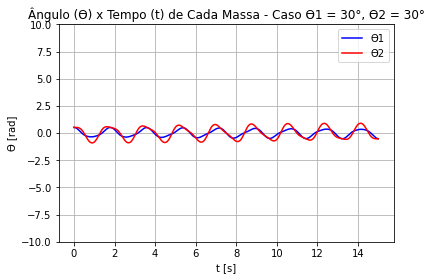

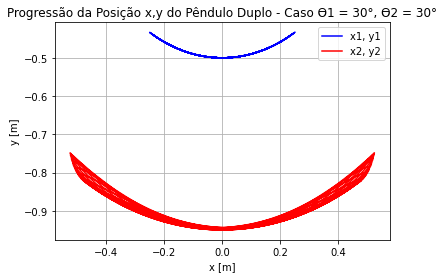

In [12]:
theta1, theta2, omega1, omega2, t1, t = solve(t_final_sim, N_pts, theta1_0, theta2_0, omega1_0, omega2_0)

x1, y1, x2, y2 = get_x1y1x2y2(t, theta1, theta2, l1, l2) 

plot_angxtemp(theta1, theta2, omega1, omega2, t1, t, theta1_0_d, theta2_0_d)

plot_pos_progress(x1, y1, x2, y2, theta1_0_d, theta2_0_d)

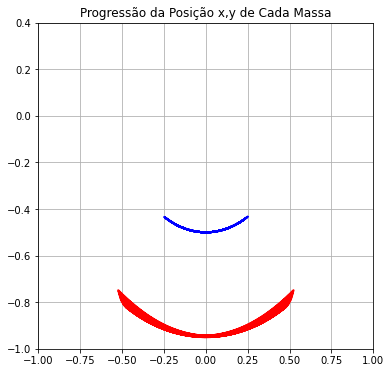

In [ ]:
ani_pos = plot_pos_progress_ani(l1, l2, x1, y1, x2, y2, t, t_final_sim)

#Descomente abaixo e execute para carregar a animação
ani_pos

In [ ]:
ani_pend = plot_pend_ani(l1, l2, x1, y1, x2, y2, t, t_final_sim)

#Descomente abaixo e execute para carregar a animação
ani_pend